# Earthquake in Gansu,China and Japan published on BBC NEWS with Corpus Analysis

# # Introduction

When it comes to natural calamities,the seismic tremors that shake the earth's foundation not only leave physical scars on the affected regions but also reverberate throughout human history. This research project aims to conduct a textual analysis of BBC News coverage on earthquakes in Gansu (China) and Japan delving into the language employed in a total of 14 selected news articles from BBC News—three focusing on the Gansu Earthquake and eleven on earthquakes in Japan. The primary objective is to compare and analyze the word frequency, parts of speech, and linguistic distribution across these articles, gaining insights into the international media's reporting attitudes, perspectives, and language choices when earthquakes occur in different regions. 

# #Research Question

The central research question guiding this investigation is  "How does the linguistic representation differ between Gansu and Japan earthquake reports?"  Leveraging natural language processing methods, particularly spaCy, this research seeks to disentangle the linguistic components embedded in the articles.

The analysis aims to identify nuanced details and overall themes that underlie the portrayal of global efforts following the Gansu and Japan earthquakes and draw comparisons between the earthquake reports of Gansu and Japan.  The choice of BBC News as the primary source ensures a globally informed perspective, providing a comprehensive understanding of how language in media narratives contributes to shaping perceptions of the international community's role in disaster response.

This investigation not only contributes to the discourse on media representation but also offers insights into the dynamics of global collaboration during times of crisis, comparing language usage across different seismic events.  The final objective of this investigation is to unravel the linguistic tapestry woven through these pieces, gaining a deeper comprehension of how language influences and reflects our perception of the global community's response to earthquakes in distinct regions.  


In [4]:
!pip install nbformat --upgrade

In [5]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.graph_objects as go
import plotly.express as px

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
#Create empty lists for file names and contents
texts = []
file_names = []

# Iterate through each file in the folder
for _file_name in os.listdir('txt_files'):
# Look for only text files
    if _file_name.endswith('.txt'):
    # Append contents of each text file to text list
        texts.append(open('txt_files' + '/' + _file_name, 'r',encoding='utf-8').read())
        # Append name of each file to file name list
        file_names.append(_file_name)

In [7]:
# Create dictionary object associating each file name with its text
d = {'Filename':file_names,'Text':texts}

In [8]:
# Turn dictionary into a dataframe
paper_df = pd.DataFrame(d)

In [9]:
print(paper_df)

            Filename                                               Text
0     BBC-Gansu1.txt  Rescuers search for survivors as China earthqu...
1    BBC-Janpan1.txt  48 dead as Japan earthquake leaves homes flatt...
2     BBC-Gansu2.txt  Gansu earthquake: Over 120 killed in China's d...
3    BBC-Janpan3.txt  What a century of earthquakes has taught Japan...
4    BBC-Janpan2.txt  Japan earthquake: Powerful tremors destroy bui...
5     BBC-Gansu3.txt  Gansu earthquake: Authorities nearing end of r...
6    BBC-Janpan6.txt  Japan earthquake: Eerie search for bodies near...
7    BBC-Janpan7.txt  Japan earthquake: Woman in her 80s found as cr...
8     BBC-Gansu4.txt  Diners sprint from cafe as deadly China earthq...
9    BBC-Janpan5.txt  Japan earthquake: Fires hit quake zone as resc...
10  BBC-Janpan11.txt  Japan earthquake death toll rises to 161\nBy K...
11  BBC-Janpan10.txt  Japan earthquake: The tiny firm that alerts mi...
12   BBC-Janpan4.txt  How Japan’s powerful earthquakes have shif

In [10]:
paper_df.head()

,Filename,Text
0,BBC-Gansu1.txt,Rescuers search for survivors as China earthqu...
1,BBC-Janpan1.txt,48 dead as Japan earthquake leaves homes flatt...
2,BBC-Gansu2.txt,Gansu earthquake: Over 120 killed in China's d...
3,BBC-Janpan3.txt,What a century of earthquakes has taught Japan...
4,BBC-Janpan2.txt,Japan earthquake: Powerful tremors destroy bui...


In [11]:
# Remove extra spaces from papers
paper_df['Text'] = paper_df['Text'].str.replace('\s+', ' ', regex=True).str.strip()
paper_df.head()

,Filename,Text
0,BBC-Gansu1.txt,Rescuers search for survivors as China earthqu...
1,BBC-Janpan1.txt,48 dead as Japan earthquake leaves homes flatt...
2,BBC-Gansu2.txt,Gansu earthquake: Over 120 killed in China's d...
3,BBC-Janpan3.txt,What a century of earthquakes has taught Japan...
4,BBC-Janpan2.txt,Japan earthquake: Powerful tremors destroy bui...


In [12]:
# Load metadata.
metadata_df = pd.read_csv('metadata.csv')
metadata_df.head()

,NewsID,PublishedDate,Author,Title,NewsTAG,CountryofIncident,Authority
0,BBC-Gansu1,2023/12/19,UNKNOWN,Rescuers search for survivors as China earthqu...,China,China,BBC NEWS
1,BBC-Gansu2,2023/12/19,Frances Mao & Christy Cooney,Gansu earthquake- Over 120 killed in China's d...,China,China,BBC NEWS
2,BBC-Gansu3,2023/12/20,Frances Mao,Gansu earthquake- Authorities nearing end of r...,China,China,BBC NEWS
3,BBC-Gansu4,2023/12/19,UNKNOWN,Diners sprint from cafe as deadly China earthq...,Aisa,China,BBC NEWS
4,BBC-Janpan1,2024/1/1,Jean Mackenzie,48 dead as Japan earthquake leaves homes flatt...,Asia,Japan,BBC NEWS


In [13]:
print(metadata_df)

          NewsID PublishedDate                        Author  \
0     BBC-Gansu1    2023/12/19                       UNKNOWN   
1     BBC-Gansu2    2023/12/19  Frances Mao & Christy Cooney   
2     BBC-Gansu3    2023/12/20                   Frances Mao   
3     BBC-Gansu4    2023/12/19                       UNKNOWN   
4    BBC-Janpan1      2024/1/1                Jean Mackenzie   
5    BBC-Janpan2      2024/1/2                       UNKNOWN   
6    BBC-Janpan3      2024/1/2        Rupert Wingfield-Hayes   
7    BBC-Janpan4      2024/1/2                 Jonathan Amos   
8    BBC-Janpan5      2024/1/3                       UNKNOWN   
9    BBC-Janpan6      2024/1/4                Jean Mackenzie   
10   BBC-Janpan7      2024/1/4     Jean Mackenzie & Kelly Ng   
11   BBC-Janpan8      2024/1/5                       UNKNOWN   
12   BBC-Janpan9      2024/1/6                    Vicky Wong   
13  BBC-Janpan10      2024/1/6                     Mariko Oi   
14  BBC-Janpan11      2024/1/8          

In [14]:
# Remove .txt from title of each paper
paper_df['Filename'] = paper_df['Filename'].str.replace('.txt', '', regex=True)
# Rename column from  NewsID to Title
metadata_df.rename(columns={"NewsID": "Filename"}, inplace=True)

In [15]:
final_paper_df = metadata_df.merge(paper_df,on='Filename')

In [16]:
# Print DataFrame
final_paper_df.head()

,Filename,PublishedDate,Author,Title,NewsTAG,CountryofIncident,Authority,Text
0,BBC-Gansu1,2023/12/19,UNKNOWN,Rescuers search for survivors as China earthqu...,China,China,BBC NEWS,Rescuers search for survivors as China earthqu...
1,BBC-Gansu2,2023/12/19,Frances Mao & Christy Cooney,Gansu earthquake- Over 120 killed in China's d...,China,China,BBC NEWS,Gansu earthquake: Over 120 killed in China's d...
2,BBC-Gansu3,2023/12/20,Frances Mao,Gansu earthquake- Authorities nearing end of r...,China,China,BBC NEWS,Gansu earthquake: Authorities nearing end of r...
3,BBC-Gansu4,2023/12/19,UNKNOWN,Diners sprint from cafe as deadly China earthq...,Aisa,China,BBC NEWS,Diners sprint from cafe as deadly China earthq...
4,BBC-Janpan1,2024/1/1,Jean Mackenzie,48 dead as Japan earthquake leaves homes flatt...,Asia,Japan,BBC NEWS,48 dead as Japan earthquake leaves homes flatt...


In [17]:
final_paper_df.shape

(15, 8)

In [19]:
import re
def clean_text(Text):
    # Remove special characters, digits, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', Text)
    # Convert to lowercase
    text = text.lower()
    # Remove newline characters
    text = text.replace('\n', ' ')
    return text

# Apply the clean_text function to the 'text' column to create a new 'cleaned_text' column
final_paper_df['cleaned_text'] = final_paper_df['Text'].apply(clean_text)

In [20]:
final_paper_df.head()

,Filename,PublishedDate,Author,Title,NewsTAG,CountryofIncident,Authority,Text,cleaned_text
0,BBC-Gansu1,2023/12/19,UNKNOWN,Rescuers search for survivors as China earthqu...,China,China,BBC NEWS,Rescuers search for survivors as China earthqu...,rescuers search for survivors as china earthqu...
1,BBC-Gansu2,2023/12/19,Frances Mao & Christy Cooney,Gansu earthquake- Over 120 killed in China's d...,China,China,BBC NEWS,Gansu earthquake: Over 120 killed in China's d...,gansu earthquake over killed in chinas deadli...
2,BBC-Gansu3,2023/12/20,Frances Mao,Gansu earthquake- Authorities nearing end of r...,China,China,BBC NEWS,Gansu earthquake: Authorities nearing end of r...,gansu earthquake authorities nearing end of re...
3,BBC-Gansu4,2023/12/19,UNKNOWN,Diners sprint from cafe as deadly China earthq...,Aisa,China,BBC NEWS,Diners sprint from cafe as deadly China earthq...,diners sprint from cafe as deadly china earthq...
4,BBC-Janpan1,2024/1/1,Jean Mackenzie,48 dead as Japan earthquake leaves homes flatt...,Asia,Japan,BBC NEWS,48 dead as Japan earthquake leaves homes flatt...,dead as japan earthquake leaves homes flatten...


In [21]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download Stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# apply function and create a new column
final_paper_df['clean_text_without_stopwords'] = final_paper_df['cleaned_text'].apply(remove_stopwords)

final_paper_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huangyuxin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/huangyuxin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Filename,PublishedDate,Author,Title,NewsTAG,CountryofIncident,Authority,Text,cleaned_text,clean_text_without_stopwords
0,BBC-Gansu1,2023/12/19,UNKNOWN,Rescuers search for survivors as China earthqu...,China,China,BBC NEWS,Rescuers search for survivors as China earthqu...,rescuers search for survivors as china earthqu...,rescuers search survivors china earthquake kil...
1,BBC-Gansu2,2023/12/19,Frances Mao & Christy Cooney,Gansu earthquake- Over 120 killed in China's d...,China,China,BBC NEWS,Gansu earthquake: Over 120 killed in China's d...,gansu earthquake over killed in chinas deadli...,gansu earthquake killed chinas deadliest quake...
2,BBC-Gansu3,2023/12/20,Frances Mao,Gansu earthquake- Authorities nearing end of r...,China,China,BBC NEWS,Gansu earthquake: Authorities nearing end of r...,gansu earthquake authorities nearing end of re...,gansu earthquake authorities nearing end rescu...
3,BBC-Gansu4,2023/12/19,UNKNOWN,Diners sprint from cafe as deadly China earthq...,Aisa,China,BBC NEWS,Diners sprint from cafe as deadly China earthq...,diners sprint from cafe as deadly china earthq...,diners sprint cafe deadly china earthquake hit...
4,BBC-Janpan1,2024/1/1,Jean Mackenzie,48 dead as Japan earthquake leaves homes flatt...,Asia,Japan,BBC NEWS,48 dead as Japan earthquake leaves homes flatt...,dead as japan earthquake leaves homes flatten...,dead japan earthquake leaves homes flattened r...


In [22]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# define a function to count word frequency
def word_frequency(text):
    words = word_tokenize(text)
    word_freq = Counter(words)
    return word_freq

# apply the function and create a new column called word_freq
final_paper_df['word_freq'] = final_paper_df['clean_text_without_stopwords'].apply(word_frequency)
final_paper_df['word_freq']

0     {'rescuers': 2, 'search': 2, 'survivors': 2, '...
1     {'gansu': 7, 'earthquake': 5, 'killed': 4, 'ch...
2     {'gansu': 6, 'earthquake': 5, 'authorities': 3...
3     {'diners': 1, 'sprint': 1, 'cafe': 1, 'deadly'...
4     {'dead': 1, 'japan': 4, 'earthquake': 3, 'leav...
5     {'japan': 2, 'earthquake': 2, 'powerful': 2, '...
6     {'century': 1, 'earthquakes': 2, 'taught': 1, ...
7     {'japans': 1, 'powerful': 1, 'earthquakes': 1,...
8     {'japan': 9, 'earthquake': 6, 'fires': 2, 'hit...
9     {'japan': 3, 'earthquake': 5, 'eerie': 1, 'sea...
10    {'japan': 5, 'earthquake': 5, 'woman': 5, 'fou...
11    {'japan': 4, 'earthquake': 4, 'nearly': 1, 'mi...
12    {'japan': 4, 'earthquake': 3, 'woman': 4, 'fou...
13    {'japan': 5, 'earthquake': 8, 'tiny': 1, 'firm...
14    {'japan': 2, 'earthquake': 3, 'death': 3, 'tol...
Name: word_freq, dtype: object

In [23]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [24]:
#Define example sentence
sentence = "This is 'an' example? sentence"

# Call the nlp model on the sentence
doc = nlp(sentence)

In [25]:
# Loop through each token in doc object
for token in doc:
    # Print text and part of speech for each
    print(token.text, token.pos_)

This PRON
is AUX
' PUNCT
an DET
' PUNCT
example NOUN
? PUNCT
sentence NOUN


In [26]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [27]:
# Apply the function to the "Text" column, so that the nlp pipeline is called on each student essay
final_paper_df['Doc'] = final_paper_df['Text'].apply(process_text)

In [28]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [29]:
# Run the token retrieval function on the doc objects in the dataframe
final_paper_df['Tokens'] = final_paper_df['Doc'].apply(get_token)
final_paper_df.head()

,Filename,PublishedDate,Author,Title,NewsTAG,CountryofIncident,Authority,Text,cleaned_text,clean_text_without_stopwords,word_freq,Doc,Tokens
0,BBC-Gansu1,2023/12/19,UNKNOWN,Rescuers search for survivors as China earthqu...,China,China,BBC NEWS,Rescuers search for survivors as China earthqu...,rescuers search for survivors as china earthqu...,rescuers search survivors china earthquake kil...,"{'rescuers': 2, 'search': 2, 'survivors': 2, '...","(Rescuers, search, for, survivors, as, China, ...","[Rescuers, search, for, survivors, as, China, ..."
1,BBC-Gansu2,2023/12/19,Frances Mao & Christy Cooney,Gansu earthquake- Over 120 killed in China's d...,China,China,BBC NEWS,Gansu earthquake: Over 120 killed in China's d...,gansu earthquake over killed in chinas deadli...,gansu earthquake killed chinas deadliest quake...,"{'gansu': 7, 'earthquake': 5, 'killed': 4, 'ch...","(Gansu, earthquake, :, Over, 120, killed, in, ...","[Gansu, earthquake, :, Over, 120, killed, in, ..."
2,BBC-Gansu3,2023/12/20,Frances Mao,Gansu earthquake- Authorities nearing end of r...,China,China,BBC NEWS,Gansu earthquake: Authorities nearing end of r...,gansu earthquake authorities nearing end of re...,gansu earthquake authorities nearing end rescu...,"{'gansu': 6, 'earthquake': 5, 'authorities': 3...","(Gansu, earthquake, :, Authorities, nearing, e...","[Gansu, earthquake, :, Authorities, nearing, e..."
3,BBC-Gansu4,2023/12/19,UNKNOWN,Diners sprint from cafe as deadly China earthq...,Aisa,China,BBC NEWS,Diners sprint from cafe as deadly China earthq...,diners sprint from cafe as deadly china earthq...,diners sprint cafe deadly china earthquake hit...,"{'diners': 1, 'sprint': 1, 'cafe': 1, 'deadly'...","(Diners, sprint, from, cafe, as, deadly, China...","[Diners, sprint, from, cafe, as, deadly, China..."
4,BBC-Janpan1,2024/1/1,Jean Mackenzie,48 dead as Japan earthquake leaves homes flatt...,Asia,Japan,BBC NEWS,48 dead as Japan earthquake leaves homes flatt...,dead as japan earthquake leaves homes flatten...,dead japan earthquake leaves homes flattened r...,"{'dead': 1, 'japan': 4, 'earthquake': 3, 'leav...","(48, dead, as, Japan, earthquake, leaves, home...","[48, dead, as, Japan, earthquake, leaves, home..."


In [30]:
tokens = final_paper_df[['Text', 'Tokens']].copy()
tokens.head()

,Text,Tokens
0,Rescuers search for survivors as China earthqu...,"[Rescuers, search, for, survivors, as, China, ..."
1,Gansu earthquake: Over 120 killed in China's d...,"[Gansu, earthquake, :, Over, 120, killed, in, ..."
2,Gansu earthquake: Authorities nearing end of r...,"[Gansu, earthquake, :, Authorities, nearing, e..."
3,Diners sprint from cafe as deadly China earthq...,"[Diners, sprint, from, cafe, as, deadly, China..."
4,48 dead as Japan earthquake leaves homes flatt...,"[48, dead, as, Japan, earthquake, leaves, home..."


In [31]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


In [32]:
entities = []
for doc in final_paper_df['Doc']:
    entities.append([(ent.text, ent.label_) for ent in doc.ents])

final_paper_df['Entities'] = entities

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each article
sentiment_scores = final_paper_df['Text'].apply(lambda x: analyzer.polarity_scores(x))
final_paper_df['Sentiment'] = sentiment_scores

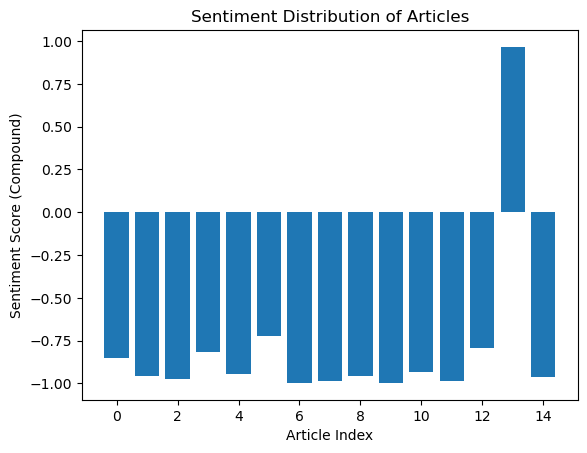

In [34]:
import matplotlib.pyplot as plt

# Plotting sentiment distribution
plt.bar(final_paper_df.index, final_paper_df['Sentiment'].apply(lambda x: x['compound']))
plt.xlabel('Article Index')
plt.ylabel('Sentiment Score (Compound)')
plt.title('Sentiment Distribution of Articles')
plt.show()

In [41]:
for i, row in final_paper_df.iterrows():
    print(f"Article {i+1} Entities: {row['Entities']}")
    print(f"Context: {row['Doc'].text}")
    print()

Article 1 Entities: [('China', 'GPE'), ('100', 'CARDINAL'), ('December 2023', 'DATE'), ('At least 111', 'CARDINAL'), ('more than 250', 'CARDINAL'), ('5.9', 'CARDINAL'), ('Gansu', 'GPE'), ('north-west', 'GPE'), ('China', 'GPE'), ('China', 'GPE'), ('Xi Jinping', 'PERSON'), ('second', 'ORDINAL'), ('Xinjiang', 'GPE')]
Context: Rescuers search for survivors as China earthquake kills 100 19 December 2023 Summary * At least 111 people have been killed and more than 250 injured in the 5.9 magnitude quake that struck rural Gansu province in north-west China * Rescuers are braving freezing weather - with temperatures below -13C - to search for survivors * The government has dispatched teams of rescue workers to assist local emergency crews * China's leader Xi Jinping has ordered full rescue efforts * Power and water supplies have been disrupted in parts of the region * A second quake has been reported in Xinjiang province

Article 2 Entities: [('Gansu', 'GPE'), ('China', 'GPE'), ('19 December 20

In [36]:
from collections import Counter
import re
from nltk.corpus import stopwords

stopwords_list = set(stopwords.words("english"))

total_word_freq = Counter()
for text in final_paper_df['word_freq']:
    # Check if 'text' is a Counter object, and if so, convert it to a space-separated string
    if isinstance(text, Counter):
        text = ' '.join(text.elements())

    
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = cleaned_text.lower().split()
    filtered_words = [word for word in words if word not in stopwords_list]
    total_word_freq.update(filtered_words)

# Get top 100
top_words = total_word_freq.most_common(100)

# print top 100 words and their frequncies
for word, freq in top_words:
    print(f"{word}: {freq}")

people: 58
earthquake: 57
japan: 49
quake: 47
said: 40
rescue: 31
one: 27
hit: 25
homes: 25
bbc: 25
buildings: 24
news: 21
years: 21
many: 21
earthquakes: 21
also: 20
still: 20
monday: 19
tsunami: 19
magnitude: 18
province: 17
water: 17
roads: 17
japans: 17
noto: 17
killed: 16
collapsed: 16
town: 16
time: 15
new: 15
survivors: 14
gansu: 14
wajima: 14
struck: 13
around: 13
since: 13
mr: 13
number: 13
rescuers: 12
local: 12
region: 12
tremors: 12
ground: 12
peninsula: 12
chinas: 11
efforts: 11
reported: 11
chinese: 11
country: 11
january: 11
day: 11
woman: 11
china: 10
least: 10
power: 10
thousands: 10
landslides: 10
areas: 10
towns: 10
small: 10
damage: 9
building: 9
home: 9
told: 9
rubble: 9
would: 9
warnings: 9
japanese: 9
food: 9
death: 9
toll: 9
disaster: 9
suzu: 9
nerv: 9
injured: 8
shaking: 8
residents: 8
officials: 8
remote: 8
us: 8
powerful: 8
city: 8
wooden: 8
hours: 8
information: 8
ishimori: 8
search: 7
supplies: 7
damaged: 7
triggered: 7
authorities: 7
aftershocks: 7
casualt

In [38]:
# define a function
def count_unique_words(word_freq):
    return len(word_freq)

# 假设 'word_freq' 列包含 Counter 对象
final_paper_df['word_count'] = final_paper_df['word_freq'].apply(count_unique_words)
final_paper_df['word_count']

0      49
1     233
2     235
3      48
4      81
5      76
6     287
7     220
8     245
9     359
10    231
11    191
12    170
13    294
14    150
Name: word_count, dtype: int64

In [39]:
result_df = pd.DataFrame()
def count_word_occurrences(word_freq, target_word):
    return word_freq.get(target_word, 0)

target_word = "time"
result_df['time_occurrences'] = final_paper_df['word_freq'].apply(lambda x: count_word_occurrences(x, target_word))
result_df['word_count'] = final_paper_df['word_count']

result_df['time_ratio'] = result_df['time_occurrences'] / result_df['word_count']
result_df['time_ratio']

0     0.000000
1     0.004292
2     0.004255
3     0.020833
4     0.024691
5     0.000000
6     0.003484
7     0.004545
8     0.004082
9     0.002786
10    0.008658
11    0.000000
12    0.005882
13    0.006803
14    0.006667
Name: time_ratio, dtype: float64

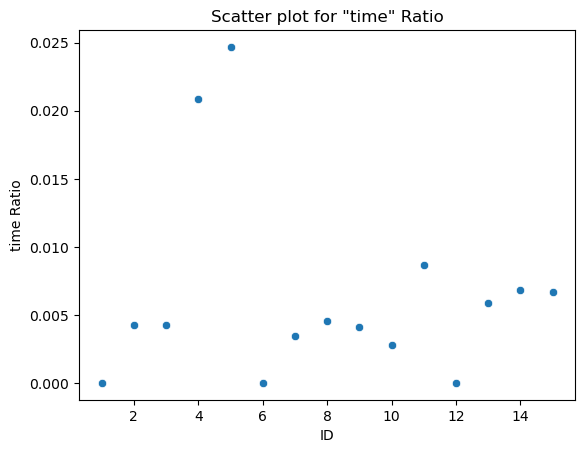

In [40]:
import seaborn as sns

result_df['ID'] = result_df.reset_index().index + 1

sns.scatterplot(x='ID', y='time_ratio', data=result_df, marker='o')

plt.title('Scatter plot for "time" Ratio')
plt.xlabel('ID')
plt.ylabel('time Ratio')

plt.show()

In [42]:
# Save DataFrame as csv (in Google Drive)
# Use this step only to save  csv to your computer's working directory
final_paper_df.to_csv('MICUSP_papers_with_spaCy_tags.csv')

## Conclusion

In conclusion, the comparative analysis of word frequency distribution in BBC News articles on the Gansu and Japan earthquakes reveals notable differences in linguistic representation.  The word frequency breakdown indicates that certain terms are more prominently featured in one article than the other.

For the Gansu Earthquake reports, key terms such as "Gansu," "earthquake," and "rescuers" stand out, highlighting a focus on the specific location, the seismic event itself, and the efforts of those involved in rescue operations.  On the other hand, the Japan earthquake reports emphasize terms like "Japan," "earthquake," and "japans," underlining the geographical context and the seismic nature of the incidents in Japan.

The overall word frequency analysis showcases commonalities in terms such as "people," "rescue," and "earthquake," reflecting the universal aspects of disaster reporting.  Additionally, the prominence of terms like "tsunami," "magnitude," and "province" in the Japan earthquake reports suggests a nuanced exploration of the unique challenges posed by the seismic events in Japan, such as the tsunami threat and the impact on specific regions.

These findings contribute to a nuanced understanding of the linguistic choices made in media narratives covering distinct earthquake events.  The differences in word frequency distribution shed light on the varying emphases and perspectives taken by BBC News in portraying the international community's response to earthquakes in Gansu and Japan.  Further analysis, including examination of specific lexical choices and sentiment analysis, would provide deeper insights into the linguistic nuances influencing media representation of seismic events on the global stage.